In [1]:
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt
from model import ColorizationNet
from color_quantizer import ColorQuantizer
from infer import colorize_image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"cuda.is_available: {torch.cuda.is_available()}")         
print(f"cuda.get_device_name(0): {torch.cuda.get_device_name(0)}")      

cuda.is_available: True
cuda.get_device_name(0): NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
model = ColorizationNet().to(device)
model.load_state_dict(torch.load('./weights/model/ColorizationNetWeights.pt', map_location=device, weights_only=True))

ab_bins_path = "./weights/pts_in_hull.npy"
quantizer = ColorQuantizer(ab_bins_path)

In [4]:
img = Image.open('./examples/gray1.jpg')
img_np = np.array(img) 
l_orig, img_out = colorize_image(img_np, model, quantizer, device)

(-0.5, 1399.5, 932.5, -0.5)

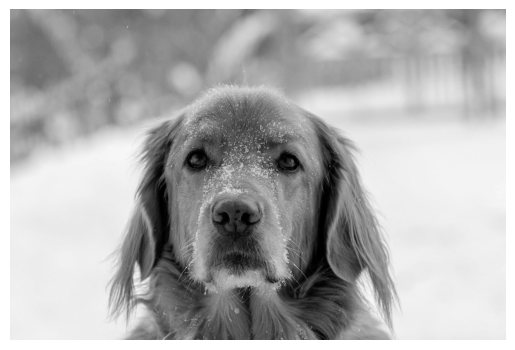

In [5]:
plt.imshow(l_orig, cmap='gray')
plt.axis("off")

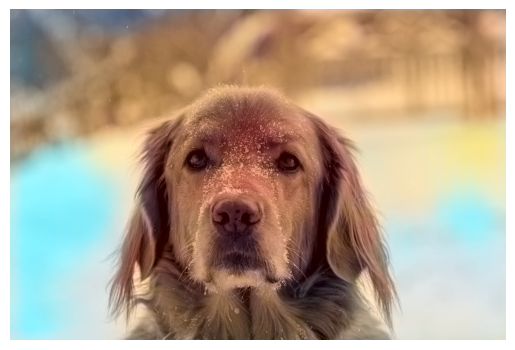

In [6]:
plt.imshow(img_out)
plt.axis("off")
plt.savefig('./examples/colorized1.png')

In [7]:
img = Image.open('./examples/gray2_525863257_053333e612.jpg')
img_np = np.array(img) 
l_orig, img_out = colorize_image(img_np, model, quantizer, device)

(-0.5, 499.5, 397.5, -0.5)

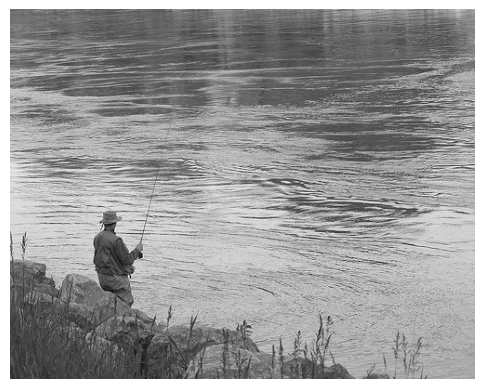

In [8]:
plt.imshow(l_orig, cmap='gray')
plt.axis("off")

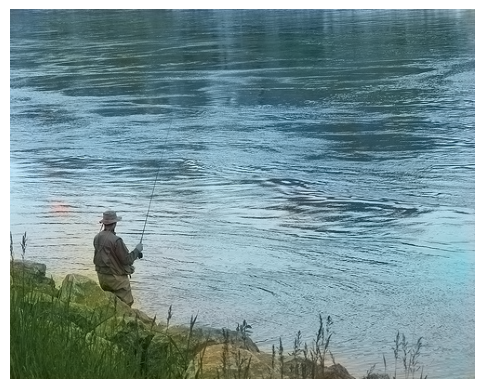

In [9]:
plt.imshow(img_out)
plt.axis("off")
plt.savefig('./examples/colorized2.png')

In [10]:
img = Image.open('./examples/gray_3_3364160101_c5e6c52b25.jpg')
img_np = np.array(img) 
l_orig, img_out = colorize_image(img_np, model, quantizer, device)

c:\Users\Abdelrahman\Desktop\cv_projects\Colorful_Image_Colorization_PyTorch\infer.py:34: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 198 negative Z values that have been clipped to zero
  rgb_out = lab2rgb(l)


(-0.5, 370.5, 499.5, -0.5)

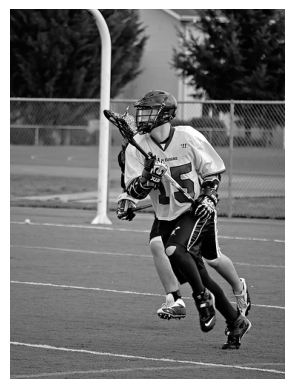

In [11]:
plt.imshow(l_orig, cmap='gray')
plt.axis("off")

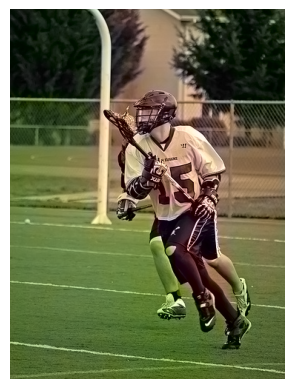

In [12]:
plt.imshow(img_out)
plt.axis("off")
plt.savefig('./examples/colorized3.png')